In [76]:
# ! pip install pandas numpy matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
# ! pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df=pd.read_csv("insurance.csv")
df.shape

(100, 8)

In [111]:
df['occupation'].unique()

array(['retired', 'freelancer', 'student', 'government_job',
       'business_owner', 'unemployed', 'private_job'], dtype=object)

In [78]:
df.isnull().mean()*100

age                           0.0
weight                        0.0
height                        0.0
income_lpa                    0.0
smoker                        0.0
city                          0.0
occupation                    0.0
insurance_premium_category    0.0
dtype: float64

In [79]:
df.duplicated().sum()

np.int64(0)

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100.0,47.1800,16.649312,18.00,34.7500,47.000000,61.0000,75.0
weight,100.0,83.8940,21.020278,51.10,63.6500,82.300000,101.3000,119.8
height,100.0,1.7132,0.110205,1.50,1.6100,1.730000,1.8100,1.9
income_lpa,100.0,18.4006,16.067465,0.53,2.8975,14.122583,30.1625,50.0


In [81]:
df.describe(include='object').T

,count,unique,top,freq
city,100,15,Jaipur,9
occupation,100,7,retired,26
insurance_premium_category,100,3,Low,34


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         100 non-null    int64  
 1   weight                      100 non-null    float64
 2   height                      100 non-null    float64
 3   income_lpa                  100 non-null    float64
 4   smoker                      100 non-null    bool   
 5   city                        100 non-null    object 
 6   occupation                  100 non-null    object 
 7   insurance_premium_category  100 non-null    object 
dtypes: bool(1), float64(3), int64(1), object(3)
memory usage: 5.7+ KB


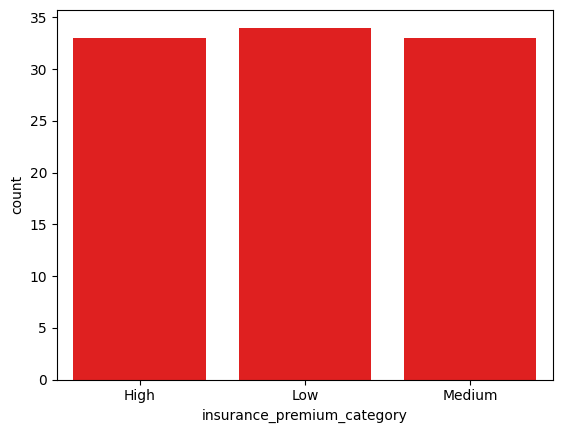

In [83]:
sns.countplot(x=df['insurance_premium_category'],color='red')
plt.show()

In [84]:
df['insurance_premium_category'].value_counts(normalize=True)*100

insurance_premium_category
Low       34.0
High      33.0
Medium    33.0
Name: proportion, dtype: float64

In [85]:
# Feature Engineering:
# BMI
df['bmi']=round(df['weight']/(df['height']**2),2) # We can drop height and weight

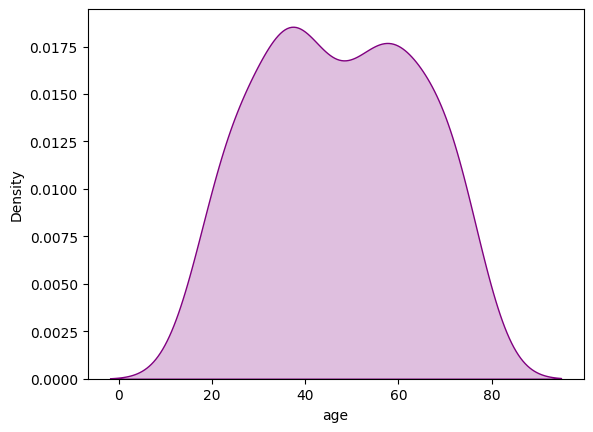

In [86]:
sns.kdeplot(df['age'],fill=True,color='purple')

plt.show()

In [87]:
# Age Group
def create_age_bins(df:pd.DataFrame,col:str)->pd.DataFrame: 
    bins=[0,20,40,60,80]
    labels = ['Child', 'Young Adult', 'Adult', 'Senior']
    df['age_group']=pd.cut(df[col],bins=bins,labels=labels)

    return df


In [88]:
create_age_bins(df,'age') # Now you can also drop the age column 

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category,bmi,age_group
0,67,119.8,1.56,2.92000,False,Jaipur,retired,High,49.23,Senior
1,36,101.1,1.83,34.28000,False,Chennai,freelancer,Low,30.19,Young Adult
2,39,56.8,1.64,36.64000,False,Indore,freelancer,Low,21.12,Young Adult
3,22,109.4,1.55,3.34000,True,Mumbai,student,Medium,45.54,Young Adult
4,69,62.2,1.60,3.94000,True,Indore,retired,High,24.30,Senior
...,...,...,...,...,...,...,...,...,...,...
95,36,52.8,1.57,19.64000,False,Indore,business_owner,Low,21.42,Young Adult
96,26,113.8,1.54,34.01000,False,Delhi,private_job,Low,47.98,Young Adult
97,52,60.8,1.80,44.86000,False,Hyderabad,freelancer,Low,18.77,Adult
98,27,101.1,1.82,28.30000,False,Kolkata,business_owner,Low,30.52,Young Adult


In [89]:
df['bmi'].describe()

count    100.000000
mean      28.844600
std        7.887091
min       14.860000
25%       22.127500
50%       29.455000
75%       33.307500
max       49.230000
Name: bmi, dtype: float64

In [90]:
condition=[
    (df["smoker"]==True) & (df["bmi"]>29.9),
    (df["smoker"] == True) & (df["bmi"] >= 24.9) & (df["bmi"] < 29.9),
    (df["smoker"]==False) & (df["bmi"]>25),
]
choices=["High","Medium","Medium"]
df["risk_category"]=np.select(condition,choices,default="Low")

In [91]:
df

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category,bmi,age_group,risk_category
0,67,119.8,1.56,2.92000,False,Jaipur,retired,High,49.23,Senior,Medium
1,36,101.1,1.83,34.28000,False,Chennai,freelancer,Low,30.19,Young Adult,Medium
2,39,56.8,1.64,36.64000,False,Indore,freelancer,Low,21.12,Young Adult,Low
3,22,109.4,1.55,3.34000,True,Mumbai,student,Medium,45.54,Young Adult,High
4,69,62.2,1.60,3.94000,True,Indore,retired,High,24.30,Senior,Low
...,...,...,...,...,...,...,...,...,...,...,...
95,36,52.8,1.57,19.64000,False,Indore,business_owner,Low,21.42,Young Adult,Low
96,26,113.8,1.54,34.01000,False,Delhi,private_job,Low,47.98,Young Adult,Medium
97,52,60.8,1.80,44.86000,False,Hyderabad,freelancer,Low,18.77,Adult,Low
98,27,101.1,1.82,28.30000,False,Kolkata,business_owner,Low,30.52,Young Adult,Medium


In [92]:
df['city'].value_counts()

city
Jaipur        9
Indore        9
Chandigarh    9
Lucknow       9
Jalandhar     9
Delhi         8
Chennai       7
Mumbai        7
Kota          6
Hyderabad     6
Mysore        6
Kolkata       5
Pune          4
Bangalore     4
Gaya          2
Name: count, dtype: int64

In [93]:

tier_1_cities = ["Mumbai", "Delhi", "Bangalore", "Chennai", "Kolkata", "Hyderabad", "Pune"]
tier_2_cities = [
    "Jaipur", "Chandigarh", "Indore", "Lucknow", "Patna", "Ranchi", "Visakhapatnam", "Coimbatore",
    "Bhopal", "Nagpur", "Vadodara", "Surat", "Rajkot", "Jodhpur", "Raipur", "Amritsar", "Varanasi",
    "Agra", "Dehradun", "Mysore", "Jabalpur", "Guwahati", "Thiruvananthapuram", "Ludhiana", "Nashik",
    "Allahabad", "Udaipur", "Aurangabad", "Hubli", "Belgaum", "Salem", "Vijayawada", "Tiruchirappalli",
    "Bhavnagar", "Gwalior", "Dhanbad", "Bareilly", "Aligarh", "Gaya", "Kozhikode", "Warangal",
    "Kolhapur", "Bilaspur", "Jalandhar", "Noida", "Guntur", "Asansol", "Siliguri"
]

In [94]:
condition=[
    df["city"].isin(tier_1_cities),
    df["city"].isin(tier_2_cities),
]
choices=[1,2]
df["city_tier"]=np.select(condition,choices,default=3)

In [95]:
df

,age,weight,height,income_lpa,smoker,city,occupation,insurance_premium_category,bmi,age_group,risk_category,city_tier
0,67,119.8,1.56,2.92000,False,Jaipur,retired,High,49.23,Senior,Medium,2
1,36,101.1,1.83,34.28000,False,Chennai,freelancer,Low,30.19,Young Adult,Medium,1
2,39,56.8,1.64,36.64000,False,Indore,freelancer,Low,21.12,Young Adult,Low,2
3,22,109.4,1.55,3.34000,True,Mumbai,student,Medium,45.54,Young Adult,High,1
4,69,62.2,1.60,3.94000,True,Indore,retired,High,24.30,Senior,Low,2
...,...,...,...,...,...,...,...,...,...,...,...,...
95,36,52.8,1.57,19.64000,False,Indore,business_owner,Low,21.42,Young Adult,Low,2
96,26,113.8,1.54,34.01000,False,Delhi,private_job,Low,47.98,Young Adult,Medium,1
97,52,60.8,1.80,44.86000,False,Hyderabad,freelancer,Low,18.77,Adult,Low,1
98,27,101.1,1.82,28.30000,False,Kolkata,business_owner,Low,30.52,Young Adult,Medium,1


In [96]:
df.drop(columns=['age','weight','height','smoker','city'],inplace=True)

In [97]:
df

,income_lpa,occupation,insurance_premium_category,bmi,age_group,risk_category,city_tier
0,2.92000,retired,High,49.23,Senior,Medium,2
1,34.28000,freelancer,Low,30.19,Young Adult,Medium,1
2,36.64000,freelancer,Low,21.12,Young Adult,Low,2
3,3.34000,student,Medium,45.54,Young Adult,High,1
4,3.94000,retired,High,24.30,Senior,Low,2
...,...,...,...,...,...,...,...
95,19.64000,business_owner,Low,21.42,Young Adult,Low,2
96,34.01000,private_job,Low,47.98,Young Adult,Medium,1
97,44.86000,freelancer,Low,18.77,Adult,Low,1
98,28.30000,business_owner,Low,30.52,Young Adult,Medium,1


In [98]:
num_col=[col for col in df.columns if df[col].dtypes in ['float64','int64']]
num_col

['income_lpa', 'bmi', 'city_tier']

In [99]:
cat_col=[col for col in df.columns if df[col].dtypes in ['object','bool','category'] and col!='insurance_premium_category']
cat_col

['occupation', 'age_group', 'risk_category']

In [100]:
df

,income_lpa,occupation,insurance_premium_category,bmi,age_group,risk_category,city_tier
0,2.92000,retired,High,49.23,Senior,Medium,2
1,34.28000,freelancer,Low,30.19,Young Adult,Medium,1
2,36.64000,freelancer,Low,21.12,Young Adult,Low,2
3,3.34000,student,Medium,45.54,Young Adult,High,1
4,3.94000,retired,High,24.30,Senior,Low,2
...,...,...,...,...,...,...,...
95,19.64000,business_owner,Low,21.42,Young Adult,Low,2
96,34.01000,private_job,Low,47.98,Young Adult,Medium,1
97,44.86000,freelancer,Low,18.77,Adult,Low,1
98,28.30000,business_owner,Low,30.52,Young Adult,Medium,1


In [101]:
X=df.drop(columns=['insurance_premium_category'])
Y=df['insurance_premium_category']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [103]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(), cat_col),
        ("num", "passthrough", num_col)
    ]
)
     

In [104]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

In [105]:
pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...), ('num', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transforme

In [106]:
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.75

In [108]:
import pickle
with open('model.pkl',"wb") as f:
    pickle.dump(pipeline,f)